<span style="font-size:20px; color:red;"> SUBJECT</span> <br>
<span style="font-size:18px"> 1. The asteroid named 2024 YR4 will pass close to Earth in December 2032. <br>
<span style="font-size:18px"> 2. There is a risk of hitting the Moon. <br>
 
<span style="font-size:20px; color:red;"> GOALS</span><br>
<span style="font-size:16px">
<span style="font-size:16px">1. Examining 2024 YR4 in the exact time period: October 01, 2032 - March 01, 2033. <br>
<span style="font-size:16px">2. Plotting the distance of YR4 from the Sun, Moon and Earth over that time.<br>
<span style="font-size:16px">3. Plotting the change of the Earth-YR4-Sun angle over time.<br>
<span style="font-size:16px">4. Showing the ground-track of YR4 around the Time of Closest Approach (TCA) (within a total of 12 hours, 6 hours before and after). A map drawing showing which points YR4 passed over on the Earth's surface.<br>
<span style="font-size:16px">5. Showing the ground-track of YR4 around the Time of Closest Approach (TCA) (within a total of 12 hours, 6 hours before and after). A map drawing showing which points YR4 passed over on the Moon's surface.

<span style="font-size:20px; color: red; "> LIBRARIES </span><br>
<span style="font-size:16px"> 
<span style="font-size:16px">1. import numpy as np<br>
Purpose: Used for numerical calculations and data operations<br>
<span style="font-size:16px">2. import matplotlib.pyplot as plt <br>
Purpose: Used for drawing graphs.<br>
<span style="font-size:16px">3. import spiceypy as spice<br>
Purpose: Python interface to NASA's SPICE library.<br>
<span style="font-size:16px">4. from datetime import datetime, timedelta<br>
Purpose: Used for performing time and date operations.<br>
<span style="font-size:16px">5. import matplotlib.image as mpimg<br>
Purpose: Reading visual files and using them with matplotlib.<br>
<span style="font-size:16px">6. from matplotlib.dates import DateFormatter<br>
Purpose: Used for formatting time axes in matplotlib graphs.<br>
<span style="font-size:16px">7. import os<br>
Purpose: Used for file operations related to the operating system.<br>
File path control, directory creation, file existence control.<br>

In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spice
from datetime import datetime, timedelta
import matplotlib.image as mpimg
from matplotlib.dates import DateFormatter
import os

In [3]:
# These are for editing the appearance of the drawings. When the code is run, the graphics that will be drawn:

# Set plotting preferences - DISABLE LaTeX which is causing the error
plt.rcParams['text.usetex'] = False  # Changed from True to avoid LaTeX errors
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1

In [4]:
# Clear previous SPICE kernels
spice.kclear()

# %%
# naif0012.tls --->	Time (LSK) file: UTC ↔ Ephemeris Time conversions
# de432s.bsp  --->	Planet Ephemeris (SPK): Positions of Solar System objects
# 54509621_YR4.bsp --->	Orbit of Asteroid 2024 YR4
# gm_de432.tpc --->	Gravitational constants (PCK): Sun, planet masses
# pck00010.tpc --->	Planet rotation and orientation information (PCK)

# %%
# Check if kernel files exist before loading
kernel_files = [
    'kernels/naif0012.tls',
    'kernels/de432s.bsp',
    'kernels/de440.bsp',
    'kernels/54509621_YR4.bsp',
    'kernels/gm_de432.tpc',
    'kernels/pck00010.tpc'
]

#When the Python program is run, it checks if there is a folder called "kernels".
#If it doesn't exist → it creates this folder.
os.makedirs('kernels', exist_ok=True)

missing_files = [f for f in kernel_files if not os.path.exists(f)]
if missing_files:
    print("Warning: The following SPICE kernel files are missing:")
    for file in missing_files: 
        print(f" - {file}") #Lists each missing file name in the loop above
    print("\nPlease download these files from the NAIF SPICE website:") 
    print("https://naif.jpl.nasa.gov/pub/naif/") #If the file is missing, it prints a message to the user showing where they can download these files.
    print("\nContinuing with available kernels...")

# Load available SPICE kernels
for kernel in kernel_files:
    if os.path.exists(kernel): #It checks if each kernel file actually exists on the computer.
        try:
            spice.furnsh(kernel)  #It tries to load the kernel file. If there is an error, it goes to the except block below.
            print(f"Loaded kernel: {kernel}") #It prints loaded kernels
        except Exception as e:
            print(f"Error loading kernel {kernel}: {e}")

# Print loaded kernels info
print(f"Number of LSK  kernels: {spice.ktotal('lsk')}")
print(f"Number of SPK  kernels: {spice.ktotal('spk')}")
print(f"Number of PCK  kernels: {spice.ktotal('pck')}")
print(f"Number of CK   kernels: {spice.ktotal('ck')}")
print(f"Number of TEXT kernels: {spice.ktotal('text')}")
print(f"\nTOTAL kernels number: {spice.ktotal('all')}")

# %%
# Define celestial bodies
def nbody_init(labels): #This line defines a function. It takes an input called labels (expected list).
    bodies = {}         #Creates an empty dictionary.
    for label in labels:
        bodies[label] = label  #Each celestial body name will be stored in this dictionary as a key and its value as itself
    return bodies

labels = [
    'Sun', 'Mercury', 'Venus', 'Earth', 'Moon', 
    'Mars Barycenter', 'Jupiter Barycenter', 'Saturn Barycenter', 
    'Uranus Barycenter', 'Neptune Barycenter', 'Pluto Barycenter'
]

bodies = nbody_init(labels)
print(bodies)

Loaded kernel: kernels/naif0012.tls
Loaded kernel: kernels/de432s.bsp
Loaded kernel: kernels/de440.bsp
Loaded kernel: kernels/54509621_YR4.bsp
Loaded kernel: kernels/gm_de432.tpc
Loaded kernel: kernels/pck00010.tpc
Number of LSK  kernels: 0
Number of SPK  kernels: 3
Number of PCK  kernels: 0
Number of CK   kernels: 0
Number of TEXT kernels: 3

TOTAL kernels number: 6
{'Sun': 'Sun', 'Mercury': 'Mercury', 'Venus': 'Venus', 'Earth': 'Earth', 'Moon': 'Moon', 'Mars Barycenter': 'Mars Barycenter', 'Jupiter Barycenter': 'Jupiter Barycenter', 'Saturn Barycenter': 'Saturn Barycenter', 'Uranus Barycenter': 'Uranus Barycenter', 'Neptune Barycenter': 'Neptune Barycenter', 'Pluto Barycenter': 'Pluto Barycenter'}


In [5]:
# Select integration frame
center = 'SSB'  # Solar System Barycenter
frame = 'ECLIPJ2000'  # Ecliptic plane

In [6]:
# Initialize analysis parameters
asteroid_label = '2024 YR4'
asteroid_spice_id = '54509621'  # SPICE ID for 2024 YR4

# *** CORRECTED TIME RANGE ***
# Set time range around the expected close approach date (December 22, 2032)
# Start analyzing from beginning of December 2032
ref_epoch_str = '2032-September-01 00:00:00.0000 TDB'
et0 = spice.str2et(ref_epoch_str)
# End analysis at end of December 2032
final_epoch_str = '2033-February-28 00:00:00.0000 TDB'
etf = spice.str2et(final_epoch_str)

print(f"Analysis start: {spice.et2utc(et0, 'C', 4)}")
print(f"Analysis end: {spice.et2utc(etf, 'C', 4)}")

try:
    x0 = spice.spkezr(asteroid_spice_id, et0, frame, 'NONE', center)
    print("Successfully retrieved initial position data.")
except Exception as e:
    print(f"Failed to get initial position data: {e}")
    print("Make sure the 2024 YR4 kernel file is loaded correctly.")
    x0 = [np.zeros(6)]  # Fallback values

# Create time array and get positions
print("Creating time points...")
num_points = 1000  # Reduced from 100000 for faster processing during development
tt = np.linspace(et0, etf, num_points)
xx = np.zeros((6, len(tt)))  # 6 × num_points array for position and velocity
print(f"Calculating {asteroid_label} positions...")

success_count = 0
for i, t in enumerate(tt):
    try:
        # CORRECTED: Get state at the correct time point t (not et0)
        state = spice.spkezr(asteroid_spice_id, t, frame, 'NONE', center)[0]
        xx[:, i] = state
        success_count += 1
    except Exception as e:
        if i == 0 or i == len(tt)-1 or i % 100 == 0:  # Limit error reporting
            print(f"Error (point {i}): {e}")
        # Continue with zero values if there's an error

print(f"Successfully calculated {success_count}/{len(tt)} {asteroid_label} positions.")


Analysis start: 2032 AUG 31 23:58:50.8174
Analysis end: 2033 FEB 27 23:58:50.8146
Successfully retrieved initial position data.
Creating time points...
Calculating 2024 YR4 positions...
Successfully calculated 1000/1000 2024 YR4 positions.


In [7]:

# Convert ephemeris time to datetime objects
print("Converting dates...")
# Create a function to convert ET to datetime since et2datetime is not standard
def et_to_datetime(et):
    utc_str = spice.et2utc(et, 'ISOC', 3)
    try:
        # Parse ISO format date string (YYYY-MM-DDTHH:MM:SS.sss)
        return datetime.fromisoformat(utc_str.replace('Z', ''))
    except ValueError:
        # Alternative parsing if the format is different
        date_parts = utc_str.split('T')
        if len(date_parts) != 2:
            date_parts = utc_str.split()
        
        date_str = date_parts[0]
        time_str = date_parts[1] if len(date_parts) > 1 else "00:00:00"
        
        year, month, day = map(int, date_str.split('-'))
        time_parts = time_str.split(':')
        hour = int(time_parts[0]) if len(time_parts) > 0 else 0
        minute = int(time_parts[1]) if len(time_parts) > 1 else 0
        second = int(float(time_parts[2])) if len(time_parts) > 2 else 0
        
        return datetime(year, month, day, hour, minute, second)

dateTimes = [et_to_datetime(t) for t in tt]

Converting dates...


In [8]:
# Calculate positions of other celestial bodies (Earth, Moon, Sun)
print("Calculating positions of other celestial bodies...")
others = ['Earth', 'Moon', 'Sun']
planet_colors = ['#77AC30', '#A2142F', '#EDB120']
rr_planet = np.zeros((6, len(tt), len(others)))

for i, body in enumerate(others):
    print(f"  Calculating {body} positions...")
    body_success = 0

    for j, t in enumerate(tt):
        try:
            state = spice.spkezr(body, t, frame, 'NONE', center)[0]
            rr_planet[:, j, i] = state
            body_success += 1 
        except Exception as e:
            if j == 0 or j == len(tt)-1 or j % 100 == 0:  # Limit error reporting
                print(f"Error ({body}, point {j}): {e}")
    print(f"  Successfully calculated {body_success}/{len(tt)} {body} positions.")

Calculating positions of other celestial bodies...
  Calculating Earth positions...
  Successfully calculated 1000/1000 Earth positions.
  Calculating Moon positions...
  Successfully calculated 1000/1000 Moon positions.
  Calculating Sun positions...
  Successfully calculated 1000/1000 Sun positions.


In [9]:
# Calculate distances and angles
print("Calculating distances...")
# 2024 YR4-Sun distance
SA_vec = rr_planet[0:3, :, 2] - xx[0:3, :]
dist_SA = np.sqrt(SA_vec[0, :]**2 + SA_vec[1, :]**2 + SA_vec[2, :]**2)
au_sa = np.array([spice.convrt(d, 'km', 'au') for d in dist_SA])

# 2024 YR4-Earth distance
EA_vec = rr_planet[0:3, :, 0] - xx[0:3, :]
dist_EA = np.sqrt(EA_vec[0, :]**2 + EA_vec[1, :]**2 + EA_vec[2, :]**2)
au_ea = np.array([spice.convrt(d, 'km', 'au') for d in dist_EA])

# 2024 YR4-Moon distance
MA_vec = rr_planet[0:3, :, 1] - xx[0:3, :]
dist_MA = np.sqrt(MA_vec[0, :]**2 + MA_vec[1, :]**2 + MA_vec[2, :]**2)
au_ma = np.array([spice.convrt(d, 'km', 'au') for d in dist_MA])

# Calculate Earth-2024 YR4-Sun angle
print("Calculating angles...")
ang = np.zeros(len(tt))
for n in range(len(tt)):
    # Calculate dot product and normalize
    dot_product = np.dot(EA_vec[:, n], SA_vec[:, n])
    # Handle potential numerical errors with np.clip
    cos_angle = np.clip(dot_product / (dist_EA[n] * dist_SA[n]), -1.0, 1.0)
    # Convert to degrees
    ang[n] = np.arccos(cos_angle) * 180 / np.pi

Calculating distances...
Calculating angles...


In [10]:
# Find time of closest approach (TCA)
print("Calculating time of closest approach...")
min_dist_idx = np.argmin(dist_EA)
t_TCA = spice.et2utc(tt[min_dist_idx], 'C', 4)
tca_datetime = et_to_datetime(tt[min_dist_idx])
print(f"TCA: {t_TCA}")
print(f"TCA (formatted): {tca_datetime.strftime('%Y-%m-%d %H:%M:%S UTC')}")
print(f"Minimum distance to Earth: {dist_EA[min_dist_idx]:,.0f} km ({au_ea[min_dist_idx]:.6f} AU)")

# Analyze ±6 hours around TCA
print("Calculating orbit around TCA...")
t12h = np.linspace(tt[min_dist_idx] - 6*60*60, tt[min_dist_idx] + 6*60*60, 101)
xECEF = np.zeros((3, len(t12h)))  # 3xn matrix for positions

for i, t in enumerate(t12h):
    try:
        pos = spice.spkpos(asteroid_spice_id, t, 'IAU_EARTH', 'NONE', 'EARTH')[0]
        xECEF[:, i] = pos
    except Exception as e:
        if i == 0 or i == len(t12h)-1 or i % 10 == 0:  # Limit error reporting
            print(f"TCA orbit error (point {i}): {e}")

# Convert to lat/lon coordinates
print("Converting coordinates...")
lat = np.zeros(len(t12h))
lon = np.zeros(len(t12h))
radius = np.zeros(len(t12h))

for i in range(len(t12h)):
    # Extract each position vector as a standalone array
    pos_vec = np.array([xECEF[0, i], xECEF[1, i], xECEF[2, i]])
    try:
        r, lo, la = spice.reclat(pos_vec)
        radius[i] = r
        lon[i] = lo
        lat[i] = la
    except Exception as e:
        print(f"Coordinate conversion error (point {i}): {e}")

# Get position at exact TCA on Earth
print("Calculating position at TCA...")
try:
    xECEF1 = spice.spkpos(asteroid_spice_id, tt[min_dist_idx], 'IAU_EARTH', 'NONE', 'EARTH')[0]
    # Convert to a standalone numpy array to avoid issues with SPICE
    pos_vec_tca = np.array([xECEF1[0], xECEF1[1], xECEF1[2]])
    radius1, lon1, lat1 = spice.reclat(pos_vec_tca)
    print(f"TCA Earth-centered position: lat={np.degrees(lat1):.2f}°, lon={np.degrees(lon1):.2f}°, alt={radius1/1000:.2f} km")
except Exception as e:
    print(f"TCA position calculation error: {e}")
    # Set fallback values if there's an error
    radius1, lon1, lat1 = 0, 0, 0

Calculating time of closest approach...
TCA: 2032 DEC 22 10:21:32.9785
TCA (formatted): 2032-12-22 10:21:32 UTC
Minimum distance to Earth: 270,921 km (0.001811 AU)
Calculating orbit around TCA...
Converting coordinates...
Calculating position at TCA...
TCA Earth-centered position: lat=-2.28°, lon=-55.95°, alt=270.92 km


In [11]:
# Create output directory for plots
os.makedirs('yr4_output', exist_ok=True)

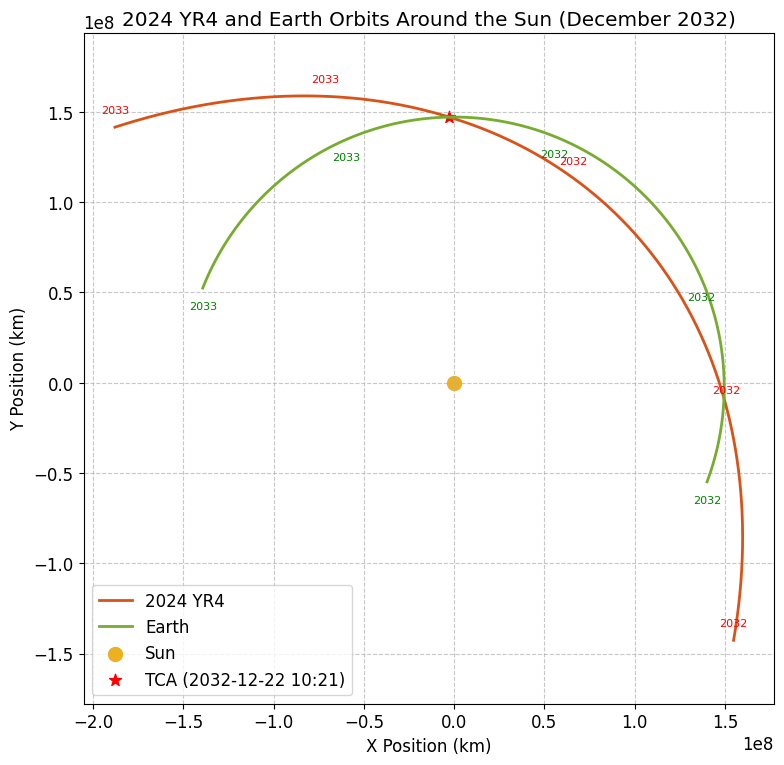

In [12]:
# Plot 2024 YR4 and Earth orbits around Sun
try:
    plt.figure(figsize=(8, 8))
    
    # Plot 2024 YR4 and Earth orbits
    plt.plot(xx[0, :], xx[1, :], linewidth=2, color='#D95319', label=asteroid_label)
    plt.plot(rr_planet[0, :, 0], rr_planet[1, :, 0], linewidth=2, color='#77AC30', label='Earth')
    
    # Plot the Sun at the center
    plt.scatter(0, 0, color='#EDB120', s=100, label='Sun')
    
    # Mark the TCA point
    plt.scatter(xx[0, min_dist_idx], xx[1, min_dist_idx], color='red', s=80, marker='*', 
               label=f'TCA ({tca_datetime.strftime("%Y-%m-%d %H:%M")})')
    
    
    # Mark a few dates along the paths for reference
    date_indices = np.linspace(0, len(tt)-1, 5, dtype=int)
    for idx in date_indices:
        if abs(idx - min_dist_idx) > len(tt)//20:  # Skip if it's close to the TCA point to avoid overlap
            date_str = spice.et2utc(tt[idx], 'C', 0).split()[0]  # Get just the date part
            plt.annotate(date_str, 
                        (xx[0, idx], xx[1, idx]),
                        textcoords="offset points",
                        xytext=(0, 10), 
                        ha='center',
                        fontsize=8,
                        color='red')
            
            plt.annotate(date_str, 
                        (rr_planet[0, idx, 0], rr_planet[1, idx, 0]), 
                        textcoords="offset points",
                        xytext=(0, -15), 
                        ha='center',
                        fontsize=8,
                        color='green')
    
    plt.title(f'{asteroid_label} and Earth Orbits Around the Sun (December 2032)')
    plt.xlabel('X Position (km)')
    plt.ylabel('Y Position (km)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axis('equal')  # Equal aspect ratio
    plt.legend(loc='lower left')
    plt.tight_layout()
    plt.savefig('yr4_output/2024YR4_earth_orbits.png', dpi=300)
    
except Exception as e:
    print(f"Orbit plot error: {e}")

Drawing plots...


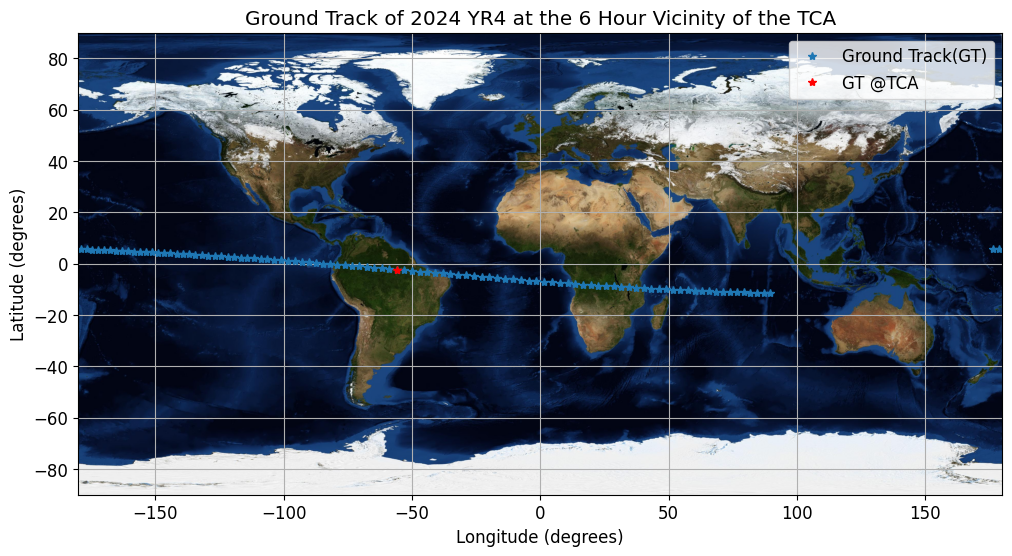

In [13]:
# Plot ground track if MAP.jpg exists
print("Drawing plots...")
map_file = 'images/MAP.jpg'
if os.path.exists(map_file):
    try:
        plt.figure(figsize=(12, 6))
        MAP = mpimg.imread(map_file)
        plt.imshow(MAP, extent=[-180, 180, -90, 90])
        plt.plot(np.degrees(lon), np.degrees(lat), '*')
        plt.plot(np.degrees(lon[50]), np.degrees(lat[50]), '*', color='r')  # Middle point approx TCA
        plt.title('Ground Track of 2024 YR4 at the 6 Hour Vicinity of the TCA')
        plt.legend(['Ground Track(GT)', 'GT @TCA'])
        plt.xlim([-180, 180])
        plt.ylim([-90, 90])
        plt.xlabel('Longitude (degrees)')
        plt.ylabel('Latitude (degrees)')
        plt.grid(True)
        plt.savefig('yr4_output/2024YR4_ground_track.png', dpi=300)
    except Exception as e:
        print(f"Ground track plot error: {e}")
else:
    print(f"Warning: Map file '{map_file}' not found. Skipping ground track plot.")
    # Create a basic ground track without the map
    try:
        plt.figure(figsize=(8, 4))
        plt.plot(np.degrees(lon), np.degrees(lat), '*')
        plt.plot(np.degrees(lon[50]), np.degrees(lat[50]), '*', color='r')  # Middle point approx TCA
        plt.title('Ground Track of 2024YR4 at the 6 Hour Vicinity of the TCA')
        plt.legend(['Ground Track(GT)', 'GT @TCA'])
        plt.xlim([-180, 180])
        plt.ylim([-90, 90])
        plt.xlabel('Longitude (degrees)')
        plt.ylabel('Latitude (degrees)')
        plt.grid(True)
        plt.savefig('yr4_output/2024YR4_ground_track_basic.png', dpi=300)
    except Exception as e:
        print(f"Basic ground track plot error: {e}")

Earth distance plot error: [Errno 2] No such file or directory: 'output/2024YR4_earth_distance.png'
Moon distance plot error: [Errno 2] No such file or directory: 'output/2024YR4_moon_distance.png'


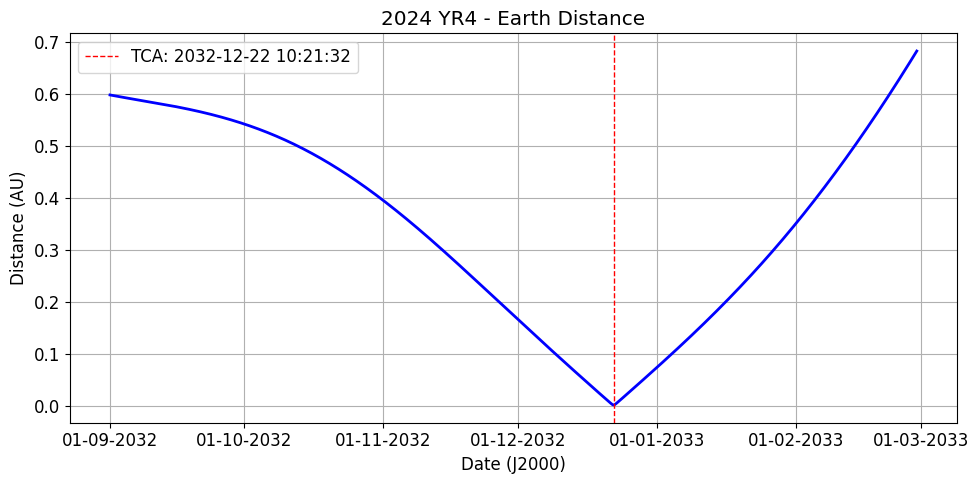

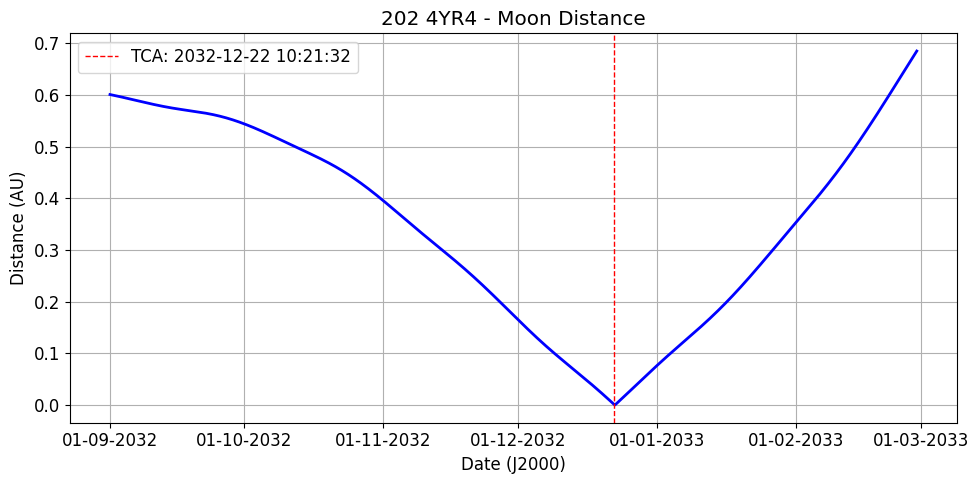

In [14]:
# Plot Earth-Asteroid distance over time
try:
    plt.figure(figsize=(10, 5))
    plt.plot(dateTimes, au_ea, linewidth=2, color='blue')
    plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
    plt.ylabel('Distance (AU)')
    plt.xlabel('Date (J2000)')
    plt.title('2024 YR4 - Earth Distance')
    plt.axvline(x=tca_datetime, color='red', linestyle='--', 
           label=f'TCA: {tca_datetime.strftime("%Y-%m-%d %H:%M:%S")}')
    
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('output/2024YR4_earth_distance.png', dpi=300)
except Exception as e:
    print(f"Earth distance plot error: {e}")


# Plot 2024YR4-Moon distance
try:
    plt.figure(figsize=(10, 5))
    plt.plot(dateTimes, au_ma, linewidth=2, color='blue')
    plt.gca().xaxis.set_major_formatter(DateFormatter('%d-%m-%Y'))
    plt.ylabel('Distance (AU)')
    plt.xlabel('Date (J2000)')
    plt.title('202 4YR4 - Moon Distance')
    plt.axvline(x=tca_datetime, color='red', linestyle='--', 
           label=f'TCA: {tca_datetime.strftime("%Y-%m-%d %H:%M:%S")}')
    
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('output/2024YR4_moon_distance.png', dpi=300)
except Exception as e:
    print(f"Moon distance plot error: {e}")

In [15]:

# Find time of closest approach (TCA) for Moon
print("\nCalculating time of closest approach to Moon...")
# Calculate distance to Moon for each time step
dist_Moon = np.zeros(len(tt))
au_moon = np.zeros(len(tt))

for i, t in enumerate(tt):
    try:
        # Get positions of asteroid and Moon in J2000 frame
        pos_asteroid = spice.spkpos(asteroid_spice_id, t, 'J2000', 'NONE', 'EARTH')[0]
        pos_moon = spice.spkpos('MOON', t, 'J2000', 'NONE', 'EARTH')[0]
        
        # Calculate distance between asteroid and Moon
        diff = pos_asteroid - pos_moon
        dist_Moon[i] = np.linalg.norm(diff)
        au_moon[i] = dist_Moon[i] / 149597870.7  # Convert to AU
    except Exception as e:
        if i == 0 or i == len(tt)-1 or i % 100 == 0:  # Limit error reporting
            print(f"Moon distance calculation error (point {i}): {e}")

# Find minimum distance to Moon
min_moon_idx = np.argmin(dist_Moon)
t_moon_TCA = spice.et2utc(tt[min_moon_idx], 'C', 4)
moon_tca_datetime = et_to_datetime(tt[min_moon_idx])
print(f"Moon TCA: {t_moon_TCA}")
print(f"Moon TCA (formatted): {moon_tca_datetime.strftime('%Y-%m-%d %H:%M:%S UTC')}")
print(f"Minimum distance to Moon: {dist_Moon[min_moon_idx]:,.0f} km ({au_moon[min_moon_idx]:.6f} AU)")

# Analyze ±6 hours around TCA for Moon
print("Calculating orbit around TCA for Moon...")
moon_t12h = np.linspace(tt[min_moon_idx] - 6*60*60, tt[min_moon_idx] + 6*60*60, 101)
moon_centered = np.zeros((3, len(moon_t12h)))  # 3xn matrix for positions

for i, t in enumerate(moon_t12h):
    try:
        # Get position in Moon-centered frame
        pos = spice.spkpos(asteroid_spice_id, t, 'IAU_MOON', 'NONE', 'MOON')[0]
        moon_centered[:, i] = pos
    except Exception as e:
        if i == 0 or i == len(moon_t12h)-1 or i % 10 == 0:  # Limit error reporting
            print(f"Moon TCA orbit error (point {i}): {e}")

# Convert to lat/lon coordinates for Moon
print("Converting Moon coordinates...")
moon_lat = np.zeros(len(moon_t12h))
moon_lon = np.zeros(len(moon_t12h))
moon_radius = np.zeros(len(moon_t12h))

for i in range(len(moon_t12h)):
    # Extract each position vector as a standalone array
    pos_vec = np.array([moon_centered[0, i], moon_centered[1, i], moon_centered[2, i]])
    try:
        r, lo, la = spice.reclat(pos_vec)
        moon_radius[i] = r
        moon_lon[i] = lo
        moon_lat[i] = la
    except Exception as e:
        print(f"Moon coordinate conversion error (point {i}): {e}")


Calculating time of closest approach to Moon...
Moon TCA: 2032 DEC 22 14:41:00.5461
Moon TCA (formatted): 2032-12-22 14:41:00 UTC
Minimum distance to Moon: 30,063 km (0.000201 AU)
Calculating orbit around TCA for Moon...
Converting Moon coordinates...


In [16]:
# Get position at exact TCA for Moon
print("Calculating position at TCA relative to Moon...")
try:
    moon_pos_tca = spice.spkpos(asteroid_spice_id, tt[min_moon_idx], 'IAU_MOON', 'NONE', 'MOON')[0]
    # Convert to a standalone numpy array to avoid issues with SPICE
    moon_pos_vec_tca = np.array([moon_pos_tca[0], moon_pos_tca[1], moon_pos_tca[2]])
    moon_radius1, moon_lon1, moon_lat1 = spice.reclat(moon_pos_vec_tca)
    print(f"TCA Moon-centered position: lat={np.degrees(moon_lat1):.2f}°, lon={np.degrees(moon_lon1):.2f}°, alt={moon_radius1/1000:.2f} km")
except Exception as e:
    print(f"TCA position calculation error (Moon): {e}")
    # Set fallback values if there's an error
    moon_radius1, moon_lon1, moon_lat1 = 0, 0, 0

Calculating position at TCA relative to Moon...
TCA Moon-centered position: lat=9.23°, lon=-47.51°, alt=30.06 km


Drawing plots...


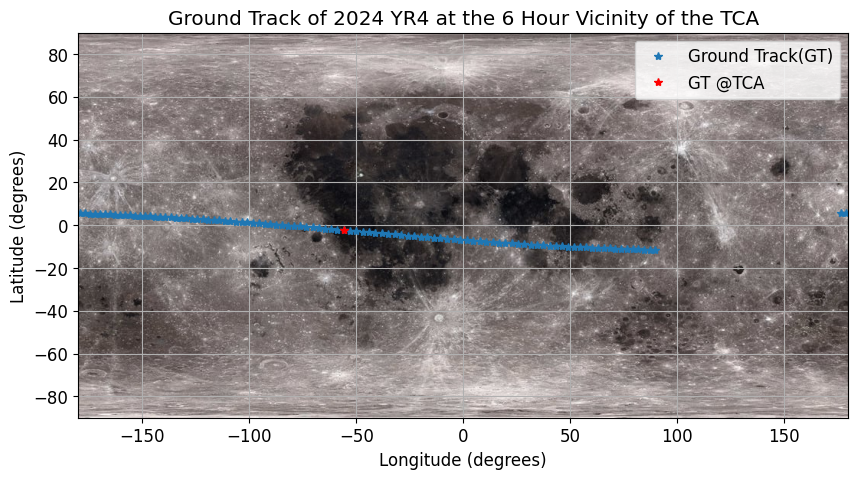

In [17]:
# Plot ground track if MAP.jpg exists
print("Drawing plots...")
map_file2= 'images/MAPMOON.jpg'
if os.path.exists(map_file2):
    try:
        plt.figure(figsize=(10, 5))
        MAPMOON = mpimg.imread(map_file2)
        plt.imshow(MAPMOON, extent=[-180, 180, -90, 90])
        plt.plot(np.degrees(lon), np.degrees(lat), '*')
        plt.plot(np.degrees(lon[50]), np.degrees(lat[50]), '*', color='r')  # Middle point approx TCA
        plt.title('Ground Track of 2024 YR4 at the 6 Hour Vicinity of the TCA')
        plt.legend(['Ground Track(GT)', 'GT @TCA'])
        plt.xlim([-180, 180])
        plt.ylim([-90, 90])
        plt.xlabel('Longitude (degrees)')
        plt.ylabel('Latitude (degrees)')
        plt.grid(True)
        plt.savefig('yr4_output/2024YR4_ground_track.png', dpi=300)
    except Exception as e:
        print(f"Ground track plot error: {e}")
else:
    print(f"Warning: Map file '{map_file2}' not found. Skipping ground track plot.")
    # Create a basic ground track without the map
    try:
        plt.figure(figsize=(8, 4))
        plt.plot(np.degrees(lon), np.degrees(lat), '*')
        plt.plot(np.degrees(lon[50]), np.degrees(lat[50]), '*', color='r')  # Middle point approx TCA
        plt.title('Ground Track of 2024YR4 at the 6 Hour Vicinity of the TCA')
        plt.legend(['Ground Track(GT)', 'GT @TCA'])
        plt.xlim([-180, 180])
        plt.ylim([-90, 90])
        plt.xlabel('Longitude (degrees)')
        plt.ylabel('Latitude (degrees)')
        plt.grid(True)
        plt.savefig('yr4_output/2024YR4_ground_track_basic.png', dpi=300)
    except Exception as e:
        print(f"Basic ground track plot error: {e}")

In [19]:
# Add code to analyze closest approaches for each year from 2028 to 2032
print("\n" + "="*50)
print("ANALYZING YEARLY CLOSEST APPROACHES (2028-2032)")
print("="*50)

# Define the years to analyze
analysis_years = [2028, 2029, 2030, 2031, 2032]
yearly_approaches = {}

# For each year, we'll analyze the asteroid's approach to Earth
for year in analysis_years:
    print(f"\nAnalyzing closest approach for {year}...")
    
    # Set time range for the year (full year)
    year_start_str = f"{year}-January-01 00:00:00.0000 TDB"
    year_end_str = f"{year}-December-31 23:59:59.9999 TDB"
    
    year_start_et = spice.str2et(year_start_str)
    year_end_et = spice.str2et(year_end_str)
    
    # Create time points for the year (use enough points for accurate results)
    year_points = 1000  # Adjust as needed for accuracy vs. performance
    year_tt = np.linspace(year_start_et, year_end_et, year_points)
    
    # Arrays to store positions
    asteroid_pos = np.zeros((3, year_points))
    earth_pos = np.zeros((3, year_points))
    
    # Retrieve positions for asteroid and Earth
    for i, t in enumerate(year_tt):
        try:
            # Get asteroid position
            asteroid_state = spice.spkezr(asteroid_spice_id, t, frame, 'NONE', center)[0]
            asteroid_pos[:, i] = asteroid_state[0:3]
            
            # Get Earth position
            earth_state = spice.spkezr('EARTH', t, frame, 'NONE', center)[0]
            earth_pos[:, i] = earth_state[0:3]
        except Exception as e:
            if i == 0 or i == len(year_tt)-1 or i % 100 == 0:  # Limit error reporting
                print(f"  Error at point {i}: {e}")
    
    # Calculate Earth-Asteroid distances
    distances = np.zeros(year_points)
    for i in range(year_points):
        diff = asteroid_pos[:, i] - earth_pos[:, i]
        distances[i] = np.sqrt(np.sum(diff**2))
    
    # Find minimum distance and corresponding time
    min_idx = np.argmin(distances)
    min_distance = distances[min_idx]
    min_time_et = year_tt[min_idx]
    min_time_utc = spice.et2utc(min_time_et, 'C', 4)
    min_time_dt = et_to_datetime(min_time_et)
    min_distance_au = spice.convrt(min_distance, 'km', 'au')
    
    # Store results
    yearly_approaches[year] = {
        'date': min_time_dt,
        'distance_km': min_distance,
        'distance_au': min_distance_au,
        'et': min_time_et
    }
    
    print(f"  Closest approach in {year}: {min_time_dt.strftime('%B %d, %Y')}")
    print(f"  Distance: {min_distance:,.0f} km ({min_distance_au:.6f} AU)")

# Sort the approaches by distance
sorted_approaches = sorted(yearly_approaches.items(), key=lambda x: x[1]['distance_km'])

# Display the sorted results
print("\n" + "="*50)
print("CLOSEST APPROACHES SUMMARY (2028-2032)")
print("="*50)

for i, (year, data) in enumerate(sorted_approaches):
    ordinal = ["1st", "2nd", "3rd", "4th", "5th"][i]
    print(f"{data['date'].strftime('%B %d, %Y')} - {ordinal} closest ({data['distance_au']:.6f} AU)")

# Optional: Create visualization of the approaches
plt.figure(figsize=(12, 6))
years = list(yearly_approaches.keys())
distances = [yearly_approaches[y]['distance_au'] for y in years]
dates = [yearly_approaches[y]['date'] for y in years]


ANALYZING YEARLY CLOSEST APPROACHES (2028-2032)

Analyzing closest approach for 2028...
  Closest approach in 2028: December 17, 2028
  Distance: 8,008,923 km (0.053536 AU)

Analyzing closest approach for 2029...
  Closest approach in 2029: December 31, 2028
  Distance: 17,160,722 km (0.114712 AU)

Analyzing closest approach for 2030...
  Closest approach in 2030: April 14, 2030
  Distance: 436,408,393 km (2.917210 AU)

Analyzing closest approach for 2031...
  Closest approach in 2031: May 27, 2031
  Distance: 445,341,874 km (2.976927 AU)

Analyzing closest approach for 2032...
  Closest approach in 2032: December 22, 2032
  Distance: 288,384 km (0.001928 AU)

CLOSEST APPROACHES SUMMARY (2028-2032)
December 22, 2032 - 1st closest (0.001928 AU)
December 17, 2028 - 2nd closest (0.053536 AU)
December 31, 2028 - 3rd closest (0.114712 AU)
April 14, 2030 - 4th closest (2.917210 AU)
May 27, 2031 - 5th closest (2.976927 AU)


<Figure size 1200x600 with 0 Axes>